### 6.3 CARGA: unificación de 6 datasets en un Dataset Unificado

Este paso solo se ejecutará una vez, debido al elevado tiempo de ejecución. Una vez se haya guardado el archivo unificado, en futuras intervenciones se llamará directamente a este archivo.

In [1]:
import pandas as pd

# Rutas de los archivos CSV en desktop
path_boston_2019 = '/Users/anafdez-valmayor/Desktop/Boston_2019.csv'
path_boston_2023 = '/Users/anafdez-valmayor/Desktop/Boston_2023.csv'
path_bayarea_2019 = '/Users/anafdez-valmayor/Desktop/BayArea_2019.csv'
path_bayarea_2023 = '/Users/anafdez-valmayor/Desktop/BayArea_2023.csv'
path_chicago_2019 = '/Users/anafdez-valmayor/Desktop/Chicago_2019.csv'
path_chicago_2023 = '/Users/anafdez-valmayor/Desktop/Chicago_2023.csv'

# Leer los archivos CSV
df_Boston2019 = pd.read_csv(path_boston_2019)
df_Boston2023 = pd.read_csv(path_boston_2023)
df_BayArea2019 = pd.read_csv(path_bayarea_2019)
df_BayArea2023 = pd.read_csv(path_bayarea_2023)
df_Chicago2019 = pd.read_csv(path_chicago_2019)
df_Chicago2023 = pd.read_csv(path_chicago_2023)

# Calcular el total de filas de los datasets originales
total_rows_original = (
    df_Boston2019.shape[0] +
    df_Boston2023.shape[0] +
    df_BayArea2019.shape[0] +
    df_BayArea2023.shape[0] +
    df_Chicago2019.shape[0] +
    df_Chicago2023.shape[0]
)

# Imprimir el total de filas
print(f"El total de filas en los archivos originales es: {total_rows_original}")

# Diccionario para estandarizar los nombres de las columnas
column_mapping = {
    'start_time': 'starttime', 
    'starttime': 'starttime',
    'started_at':'starttime',
    'stop_time': 'stoptime', 
    'stoptime': 'stoptime', 
    'end_time': 'stoptime',
    'ended_at': 'stoptime',
    'start_station_latitude': 'startlat',
    'start_lat': 'startlat',
    'start station latitude': 'startlat', 
    'start_station_longitude': 'startlong', 
    'start station longitude': 'startlong',
    'start_lng': 'startlong',
    'start_long': 'startlong',
    'end_station_latitude': 'endlat',
    'end_lat': 'endlat', 
    'end station latitude': 'endlat', 
    'end_station_longitude': 'endlong', 
    'end_lng': 'endlong',
    'end_long': 'endlong',
    'end station longitude': 'endlong', 
    'member_type': 'usertype',
    'member_casual': 'usertype',
    'user_type': 'usertype',
    'usertype': 'usertype'
}

# Función para estandarizar columnas y renombrarnas todas con un nombre estándar
def standardize_columns(df):
    df = df.rename(columns=column_mapping)  # Renombrar columnas según el diccionario
    return df

# A cada Dataframe se le aplica la estandarización para tener un archivo con las mismas columnas
df_Boston2019 = standardize_columns(df_Boston2019)
df_Boston2023 = standardize_columns(df_Boston2023)
df_BayArea2019 = standardize_columns(df_BayArea2019)
df_BayArea2023 = standardize_columns(df_BayArea2023)
df_Chicago2019 = standardize_columns(df_Chicago2019)
df_Chicago2023 = standardize_columns(df_Chicago2023)

# Unir los DataFrames
unified_df = pd.concat([
    df_Boston2019, df_Boston2023, 
    df_BayArea2019, df_BayArea2023, 
    df_Chicago2019, df_Chicago2023
], ignore_index=True)


print(f"Dataset_Unificado.csv: {unified_df.shape[0]} filas, {unified_df.shape[1]} columnas")


El total de filas en los archivos originales es: 20813775
Dataset_Unificado.csv: 20813775 filas, 8 columnas


In [2]:
#Guardar el resultado en un nuevo archivo CSV
output_path = '/Users/anafdez-valmayor/Desktop/Dataset_Unificado.csv'
unified_df.to_csv(output_path, index=False)

print(f"Unificación completada. Archivo guardado en: {output_path}")

Unificación completada. Archivo guardado en: /Users/anafdez-valmayor/Desktop/Dataset_Unificado.csv


### 7. CÁLCULO DE VELOCIDAD

### 7. 1 Cálculo de distancia Haversine

La distancia Haversine se utiliza para medir la distancia entre dos coordenadas geográficas. Se basa en una fórmula matemática que calcula la distancia entre dos puntos de una esfera de características terrestres.

In [3]:
# ATAJO Leer el archivo directamente
import pandas as pd
df_Dataset_unificado = pd.read_csv('/Users/anafdez-valmayor/Desktop/Dataset_Unificado.csv')

In [4]:
#Distancia Haversine: aplicamos la fórmula
from math import sin, cos,asin, degrees,sqrt, atan2, radians
def calculo_Haversine(latitud1, longitud1, latitud2, longitud2):
    R = 6373.0  # km de radio de la tierra
    latitud1 = radians(latitud1)
    longitud1 = radians(longitud1)
    latitud2 = radians(latitud2)
    longitud2 = radians(longitud2)
    difflon = longitud2 - longitud1
    difflat = latitud2 - latitud1
    a = sin(difflat/2)**2 + cos(latitud1) * cos(latitud2) * (sin(difflon/2))**2
    c = 2 * atan2( sqrt(a), sqrt(1-a) )
    return R * c # en kilómetros

In [5]:
# Aplicar la función a cada fila y crear una nueva columna 'Distance'
df_Dataset_unificado['Distance'] = df_Dataset_unificado.apply(
    lambda row: calculo_Haversine(
        row['startlat'], 
        row['startlong'], 
        row['endlat'], 
        row['endlong']
    ), 
    axis=1
)

# Imprimir las primeras filas para verificar
print(df_Dataset_unificado.head())


             starttime             stoptime   startlat  startlong     endlat  \
0  2019-01-01 00:09:13  2019-01-01 00:15:25  42.362131 -71.091156  42.355601   
1  2019-01-01 00:33:56  2019-01-01 00:38:20  42.366162 -71.086883  42.362428   
2  2019-01-01 00:41:54  2019-01-01 00:49:33  42.365070 -71.103100  42.373379   
3  2019-01-01 00:43:32  2019-01-01 00:49:37  42.379011 -71.119945  42.391210   
4  2019-01-01 00:49:56  2019-01-01 01:01:17  42.373231 -71.120886  42.383932   

     endlong    usertype    city  Distance  
0 -71.103945  Subscriber  Boston  1.277672  
1 -71.084955  Subscriber  Boston  0.444578  
2 -71.111075  Subscriber  Boston  1.132995  
3 -71.122608  Subscriber  Boston  1.374381  
4 -71.139613  Subscriber  Boston  1.945359  


In [6]:
# Contar cuántos registros tienen duración negativa: significaría que la formula Haversine no funciona
num_negativo_distancia = (df_Dataset_unificado['Distance'] < 0).sum() #Suma de Trues, cuando encuentra un valor menor que 0 se convierte en True
print(f"Número de registros con distancia negativa: {num_negativo_distancia}") #La suma da 0 con lo cual no hay ninguna distancia negativa

Número de registros con distancia negativa: 0


### 7. 2 Cálculo de duración de viaje

La duración del viaje se calcula como la diferencia entre stop time y start time en horas, debido a que se medirá la velocidad en km/h.

In [7]:
# Primero nos aseguramos de que el formato de starttime y stoptime sea formato fecha para que se puedan hacer operaciones. El formato fecha es datetime
df_Dataset_unificado['starttime'] = pd.to_datetime(df_Dataset_unificado['starttime'])
df_Dataset_unificado['stoptime'] = pd.to_datetime(df_Dataset_unificado['stoptime'])


In [8]:
# Se calcula la diferencia de tiempo por viaje en horas. Primero se pasa a segundos y luego a horas
df_Dataset_unificado['Duration'] = (df_Dataset_unificado['stoptime'] - df_Dataset_unificado['starttime']).dt.total_seconds() / 3600


In [9]:
print(df_Dataset_unificado.head())


            starttime            stoptime   startlat  startlong     endlat  \
0 2019-01-01 00:09:13 2019-01-01 00:15:25  42.362131 -71.091156  42.355601   
1 2019-01-01 00:33:56 2019-01-01 00:38:20  42.366162 -71.086883  42.362428   
2 2019-01-01 00:41:54 2019-01-01 00:49:33  42.365070 -71.103100  42.373379   
3 2019-01-01 00:43:32 2019-01-01 00:49:37  42.379011 -71.119945  42.391210   
4 2019-01-01 00:49:56 2019-01-01 01:01:17  42.373231 -71.120886  42.383932   

     endlong    usertype    city  Distance  Duration  
0 -71.103945  Subscriber  Boston  1.277672  0.103333  
1 -71.084955  Subscriber  Boston  0.444578  0.073333  
2 -71.111075  Subscriber  Boston  1.132995  0.127500  
3 -71.122608  Subscriber  Boston  1.374381  0.101389  
4 -71.139613  Subscriber  Boston  1.945359  0.189167  


In [10]:
# Contar cuántos registros tienen duración negativa. Debido a que la duración NO puede ser negativa
num_negative_durations = (df_Dataset_unificado['Duration'] < 0).sum()
print(f"Número de registros con duración negativa: {num_negative_durations}")

Número de registros con duración negativa: 451


In [11]:
# Filtramos y eliminamos las duraciones negativas.
df_Dataset_unificado = df_Dataset_unificado[df_Dataset_unificado['Duration'] >= 0]

# Verificar que los registros negativos han sido eliminados
print("Registros con duración negativa eliminados.")
print(df_Dataset_unificado.head())


Registros con duración negativa eliminados.
            starttime            stoptime   startlat  startlong     endlat  \
0 2019-01-01 00:09:13 2019-01-01 00:15:25  42.362131 -71.091156  42.355601   
1 2019-01-01 00:33:56 2019-01-01 00:38:20  42.366162 -71.086883  42.362428   
2 2019-01-01 00:41:54 2019-01-01 00:49:33  42.365070 -71.103100  42.373379   
3 2019-01-01 00:43:32 2019-01-01 00:49:37  42.379011 -71.119945  42.391210   
4 2019-01-01 00:49:56 2019-01-01 01:01:17  42.373231 -71.120886  42.383932   

     endlong    usertype    city  Distance  Duration  
0 -71.103945  Subscriber  Boston  1.277672  0.103333  
1 -71.084955  Subscriber  Boston  0.444578  0.073333  
2 -71.111075  Subscriber  Boston  1.132995  0.127500  
3 -71.122608  Subscriber  Boston  1.374381  0.101389  
4 -71.139613  Subscriber  Boston  1.945359  0.189167  


### 7. 3 Cálculo de velocidad y análisis descriptivo

In [12]:
# Se calcula ahora la velocidad en km/h dividiendo al distancia de cada fila por la duracion de cada fila.
# Se añade una condición. Si la duración es 0, la division va a dar error, por lo que se pondrá automáticamente 0 si estos ocurre

df_Dataset_unificado = df_Dataset_unificado.copy() # creamos una copia para no alterar el df original
df_Dataset_unificado['Speed_kmh'] = df_Dataset_unificado.apply(
    lambda row: (row['Distance']) / row['Duration'] if row['Duration'] > 0 else 0, axis=1
)


In [13]:
print(df_Dataset_unificado.head())


            starttime            stoptime   startlat  startlong     endlat  \
0 2019-01-01 00:09:13 2019-01-01 00:15:25  42.362131 -71.091156  42.355601   
1 2019-01-01 00:33:56 2019-01-01 00:38:20  42.366162 -71.086883  42.362428   
2 2019-01-01 00:41:54 2019-01-01 00:49:33  42.365070 -71.103100  42.373379   
3 2019-01-01 00:43:32 2019-01-01 00:49:37  42.379011 -71.119945  42.391210   
4 2019-01-01 00:49:56 2019-01-01 01:01:17  42.373231 -71.120886  42.383932   

     endlong    usertype    city  Distance  Duration  Speed_kmh  
0 -71.103945  Subscriber  Boston  1.277672  0.103333  12.364571  
1 -71.084955  Subscriber  Boston  0.444578  0.073333   6.062425  
2 -71.111075  Subscriber  Boston  1.132995  0.127500   8.886231  
3 -71.122608  Subscriber  Boston  1.374381  0.101389  13.555543  
4 -71.139613  Subscriber  Boston  1.945359  0.189167  10.283838  


Vamos a analizar las velocidades, haremos un análisis descriptivo para revisar si hay outliers y representar las conclusiones en gráficas.

#### 7.3.1 Rangos de velocidades: 

Se identificará  cuántos registros existen por rangos de velocidades. Esto servirá para identificar cuales son los rangos con mayor número de registros y desestimar aquellos que no parezcan razonables.

In [14]:
# Definir los rangos de velocidad
rangos = [0, 10, 20, 30, 50, float('inf')]
nombres_rangos = ['0-10 km/h', '10-20 km/h', '20-30 km/h', '30-50 km/h', '>50 km/h']

# Crear una nueva columna con los rangos de velocidad
df_Dataset_unificado = df_Dataset_unificado.copy()
df_Dataset_unificado['Rangos_veloc'] = pd.cut(df_Dataset_unificado['Speed_kmh'], bins=rangos, labels=nombres_rangos, right=False)

# Recuento del número de registros en cada rango
recuento_rangos_velocidad = df_Dataset_unificado['Rangos_veloc'].value_counts().sort_index()

# Convertir a DataFrame para mostrar
rec_rangos_df = recuento_rangos_velocidad.to_frame(name="Número de trayectos")

# A parte de calcular el núm de trayectos, se calcula tén eambil porcentaje que suponen
total_trayectos = df_Dataset_unificado.shape[0]
rec_rangos_df['Porcentaje (%)'] = (rec_rangos_df['Número de trayectos'] / total_trayectos) * 100

# Imprimir
print(rec_rangos_df)


            Número de trayectos  Porcentaje (%)
0-10 km/h              10156894       48.799961
10-20 km/h             10283702       49.409225
20-30 km/h               308776        1.483550
30-50 km/h                16366        0.078632
>50 km/h                  21724        0.104375


Gracias a esta tabla se concluye que el 99.8% de la información queda explicada analizando los rangos de velocidades desde 0 km/h a 30 km/h. En el posterior análisis descriptivo solo se analizarán los registros que tengan velocidades comprendidas entre 0-30 km/h para no reflejar información de outliers que pueden afectar a los resultados.

Nos centraremos en los registros con velocidades menores de 30 km/h ya que hemos visto que estos explican el 98% de la información.

#### 7.3.2 Análisis descriptivo de velocidades entre 0 y 30 km/h - Resumen

In [15]:
df_filtered = df_Dataset_unificado[df_Dataset_unificado['Speed_kmh'] <= 30]

In [16]:
#Comprobación de los tipos de datos en  cada variable
print(df_filtered.dtypes)

starttime       datetime64[ns]
stoptime        datetime64[ns]
startlat               float64
startlong              float64
endlat                 float64
endlong                float64
usertype                object
city                    object
Distance               float64
Duration               float64
Speed_kmh              float64
Rangos_veloc          category
dtype: object


In [17]:
# Análisis descriptivo de valores entre 0 y 30 km/h
print(df_filtered['Speed_kmh'].describe().apply(lambda x: '{:.2f}'.format(x)))

count    20749372.00
mean            9.85
std             4.52
min             0.00
25%             7.45
50%            10.10
75%            12.60
max            30.00
Name: Speed_kmh, dtype: object


La media es una velocidad ed 9.85 km/h lo que parece razonable, y la desviación típica es 4.52 km/h. Se representará ahora la distribución de velocidades.

In [18]:
# Opcional guardar una copia del archivo filtrado por menores de 30, esto será utilizado en el PowerBI
output_path = "/Users/anafdez-valmayor/Desktop/Dataset_Filtrado.csv"
df_filtered.to_csv(output_path, index=False)
print(f"Archivo CSV guardado en: {output_path}")

Archivo CSV guardado en: /Users/anafdez-valmayor/Desktop/Dataset_Filtrado.csv


### 8 Ánalisis de resultados y visualizaciones

In [19]:
# ATAJO Leer el archivo
import pandas as pd
df_filtered = pd.read_csv('/Users/anafdez-valmayor/Desktop/Dataset_Filtrado.csv')

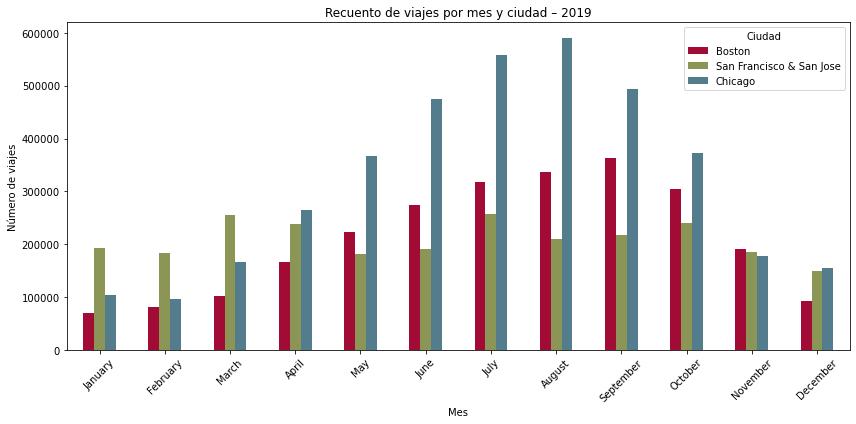

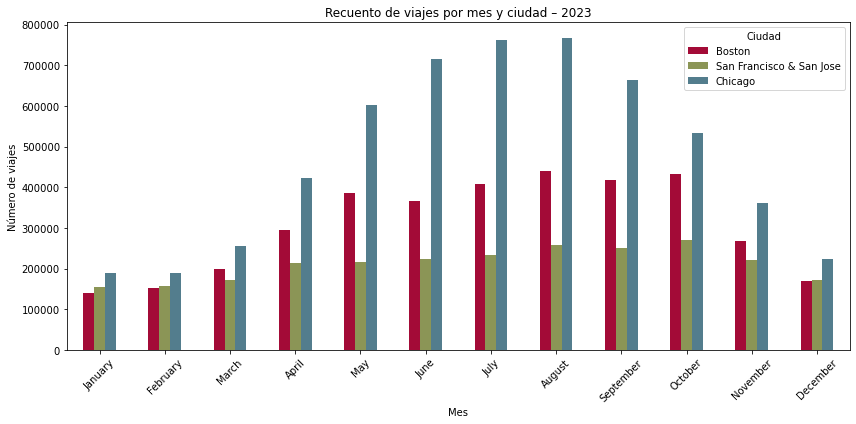

In [21]:
import matplotlib.pyplot as plt

# La columna starttime en el dataset filtrado también tiene que ser Datetime
df_filtered['starttime'] = pd.to_datetime(df_filtered['starttime'])

# Extraer mes y año
df_filtered['Mes'] = df_filtered['starttime'].dt.month_name() #extraemos el nombre del mes para facilitar la lectura
df_filtered['Año'] = df_filtered['starttime'].dt.year

# Orden correcto de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df_filtered['Mes'] = pd.Categorical(df_filtered['Mes'], categories=meses_ordenados, ordered=True) #Se ordenan los meses en orden correcto 

# Colores personalizados por ciudad
base_colors = {
    'Boston': '#A30B37',
    'San Francisco & San Jose': '#8B9556',
    'Chicago': '#537D8D'
}

# Agrupación por año, mes y ciudad
grouped = df_filtered.groupby(['Año', 'Mes', 'city']).size().reset_index(name='Recuento')

# Crear un gráfico de barras para cada año
for año in [2019, 2023]:
    df_año = grouped[grouped['Año'] == año]
    #En las columnas se representan las distintas ciudades por el mes
    pivot = df_año.pivot(index='Mes', columns='city', values='Recuento').fillna(0) #si no encuentra datos lo rellena con 0, en lugar de dejar en blanco

    # Reordenar columnas para que las áreas salgan en el orden deseado
    orden_ciudades = ['Boston', 'San Francisco & San Jose', 'Chicago']
    pivot = pivot[orden_ciudades]

    # Gráfico
    pivot.plot(kind='bar', figsize=(12, 6), color=[base_colors.get(ciudad) for ciudad in pivot.columns])
    
    plt.title(f'Recuento de viajes por mes y ciudad – {año}')
    plt.xlabel('Mes')
    plt.ylabel('Número de viajes')
    plt.xticks(rotation=45)
    plt.legend(title='Ciudad')
    plt.tight_layout()
    plt.show()

In [23]:
#Calcular numero de viajes por año
viajes_por_año = df_filtered['Año'].value_counts()
# Extraer valores de cada año
total_2019 = viajes_por_año[2019]
total_2023 = viajes_por_año[2023]

# Calcular el porcentaje de cambio
porcentaje_cambio = ((total_2023 - total_2019) / total_2019) * 100

# Mostrar resultado
print(f"Número de viajes en 2019: {total_2019:,}")
print(f"Número de viajes en 2023: {total_2023:,}")
print(f"Porcentaje de cambio: {porcentaje_cambio:.2f}%")


Número de viajes en 2019: 8,847,308
Número de viajes en 2023: 11,902,064
Porcentaje de cambio: 34.53%


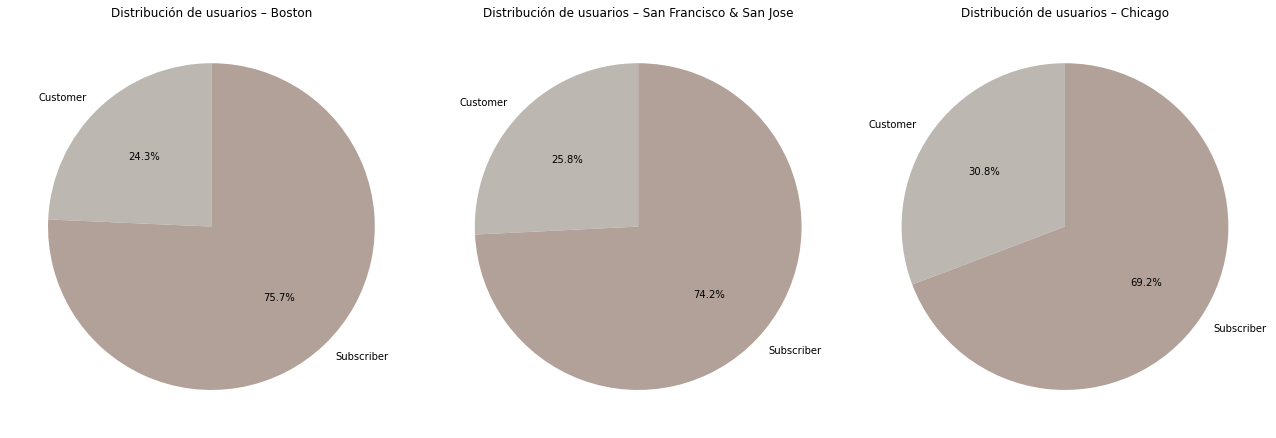

In [24]:
# Agrupar por ciudad y tipo de usuario
distribution_usuario = df_filtered.groupby(['city', 'usertype']).size().reset_index(name='count')

# Crear un diccionario para cada ciudad
cities = df_filtered['city'].unique()

# Crear 3 pie charts (uno por ciudad)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, ciudad in zip(axes, cities):
    data_ciudad = distribution_usuario[distribution_usuario['city'] == ciudad]
    labels = data_ciudad['usertype']
    sizes = data_ciudad['count']
    colors = ['#BCB8B1', '#B2A198']  

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(f'Distribución de usuarios – {ciudad}')

plt.tight_layout()
plt.show()

#### 8.1 Análisis variable VELOCIDAD

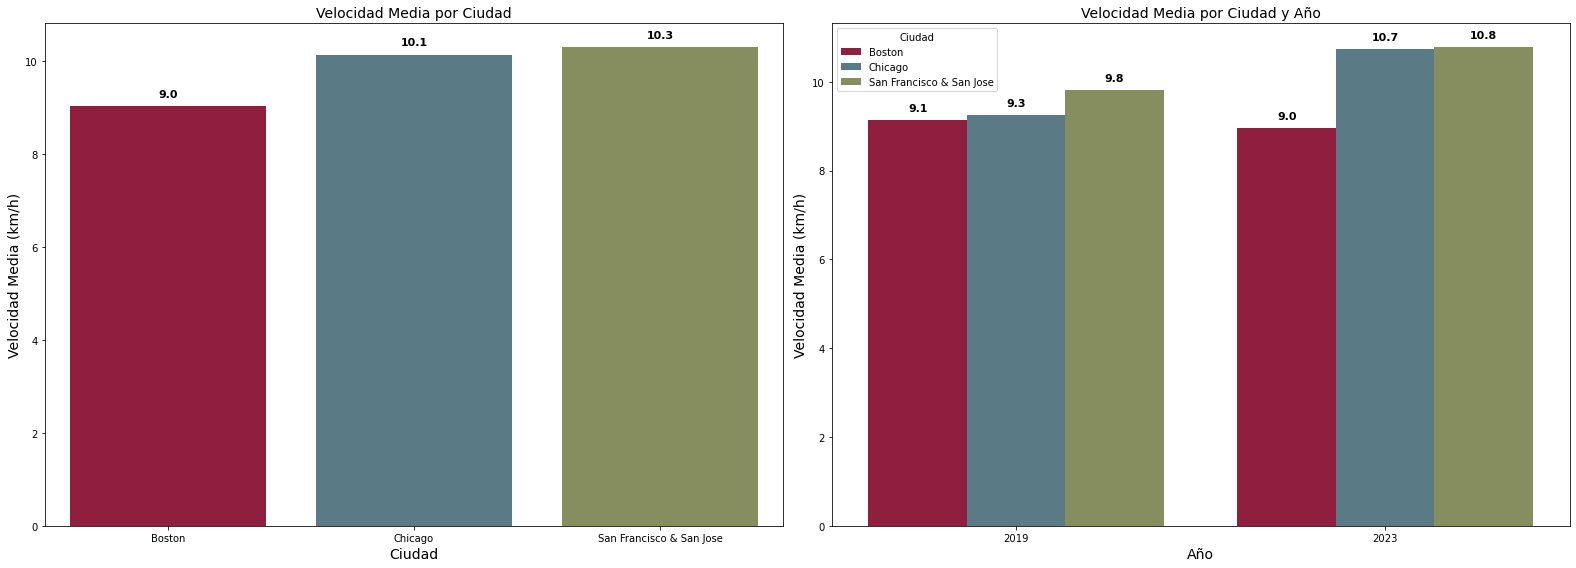

In [25]:
import seaborn as sns


# Definir colores base por ciudad
base_colors = {
    'Boston': '#A30B37',
    'Chicago': '#537D8D',
    'San Francisco & San Jose': '#8B9556'
}

# Crear copia para no alterar el archivo original
df_filtered = df_filtered.copy()

# Asegurar que la columna de fechas sea tipo datetime
df_filtered['starttime'] = pd.to_datetime(df_filtered['starttime'])
df_filtered['Year'] = df_filtered['starttime'].dt.year

# a) Velocidad media por ciudad
city_media_speed = df_filtered.groupby('city')['Speed_kmh'].mean().reset_index()

# b) Velocidad media por ciudad y año
city_year_avg_speed = df_filtered.groupby(['Year', 'city'])['Speed_kmh'].mean().reset_index()

# Configuración de la figura con 2 subgráficos en una misma salida
fig, axes = plt.subplots(1, 2, figsize=(22, 8))

# ---- GRÁFICO 1: Velocidad media por ciudad ----
ax1 = sns.barplot(ax=axes[0], x='city', y='Speed_kmh', data=city_media_speed, palette=base_colors)
axes[0].set_title('Velocidad Media por Ciudad', fontsize=14) 
axes[0].set_xlabel('Ciudad', fontsize=14)
axes[0].set_ylabel('Velocidad Media (km/h)', fontsize=14)

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.1f}', 
             ha='center', fontsize=11, fontweight='bold', color='black')

# ---- GRÁFICO 2: Velocidad media por Ciudad y Año ----
ax2 = sns.barplot(ax=axes[1], x='Year', y='Speed_kmh', hue='city', data=city_year_avg_speed, palette=base_colors)
axes[1].set_title('Velocidad Media por Ciudad y Año', fontsize=14) 
axes[1].set_xlabel('Año', fontsize=14)
axes[1].set_ylabel('Velocidad Media (km/h)', fontsize=14)
axes[1].legend(title="Ciudad", fontsize=10)

# **Añadimos etiquetas encima de las barras**
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.1f}', 
             ha='center', fontsize=11, fontweight='bold', color='black')

# Ajustar los espacios entre gráficos
plt.tight_layout()
plt.show()


Estos gráficos nos indican que la ciudad con mayor velocidad media alcanzada es San Francisco y San José. Esto se puede deber a la geografía de Califronia, la ciudad de San Francisco tiene mucha inclunación lo que probablemente cause que las bicicletas alcancen altas velocidades. Por otor lado, llama la atención el incremento en velocidad media en la ciudad de Chicago de 2019 a 2023 (aumenta 1.4 puntos). Vamos a analizar Chicago en profundidad:

#### Bonus: Deep dive en el caso de aumento de velocidad en Chicago

Se quiere profundizar en la ciudad de Chicago ya que hay una gran diferencia entre la velocidad de un año y de otro. Primeramente se analizar la hipotesis de una umento en el porcentaje de subscribers y despues se analizará el aumento en la velocidad media de los customers.

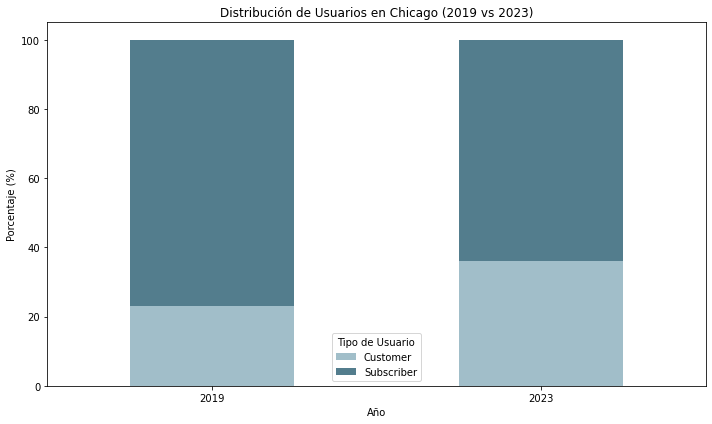

In [26]:
# Se calcula el total de viajes en chicago
chicago = df_filtered[df_filtered['city'] == 'Chicago']
total_al_year = chicago.groupby('Year').size().reset_index(name='Total')

# Canitdad de viajes por tipo de usuario y año
user_counts = chicago.groupby(['Year', 'usertype']).size().reset_index(name='Count')

# Unir con el total para calcular el porcentaje
chicago_user_dist = pd.merge(user_counts, total_al_year, on='Year')
chicago_user_dist['Percentage'] = 100 * chicago_user_dist['Count'] / chicago_user_dist['Total']

# Representar velocidad media por tipo de usuario
stacked_data = chicago_user_dist.pivot(index='Year', columns='usertype', values='Percentage').fillna(0)

# Calcular velocidades medias por tipo de usuario y año en Chicago
speed_data = df_filtered[df_filtered['city'] == 'Chicago'].groupby(['Year', 'usertype'])['Speed_kmh'].mean().reset_index()

# Crear gráfico apilado
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#A1BEC9', '#537D8D']) #colores de Chicago

plt.title('Distribución de Usuarios en Chicago (2019 vs 2023)', fontsize=12)
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Tipo de Usuario')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### 8.2 Análisis TRAYECTOS

Vamos a investigar ahora cuales han sido los trayectos más frecuentes por ciudad, por año y tipo de cliente, y los imprimiremos en un mapa. Empezaremos creando un nuevo excel con los datos del top 3 viaje más frecuente por ciudad año y cliente (3x3x2x2=36)

In [27]:
# Agrupamos por ciudad, año y combinación de coordenadas de inicio y fin, para contar frecuencias
trip_counts = df_filtered.groupby(
    ['city', 'Year', 'usertype', 'startlat', 'startlong', 'endlat', 'endlong']
).size().reset_index(name='trip_count')

#1) Filtrar viajes donde la estación de inicio y fin sean distintas 
#Aunque para condsiderarlo viaje el trayecto no tiene poruqé salir y llegar a sitios distintos, 
#en nuestro caso lo vamos a analizar de esta manera porque sino la velocidad seíra 0
trip_counts = trip_counts[(trip_counts['startlat'] != trip_counts['endlat']) | 
                          (trip_counts['startlong'] != trip_counts['endlong'])] 

# 2) Filtrar trayectos demasiado cercanos (diferencia mínima de 0.005 en latitud o longitud para considerarlo trayecto)
trip_counts = trip_counts[abs(trip_counts['startlat'] - trip_counts['endlat']) > 0.005]
trip_counts = trip_counts[abs(trip_counts['startlong'] - trip_counts['endlong']) > 0.005]

# Ordenamos ahora los datos de mayor a menor frecuencia dentro de cada ciudad, año y tipo de usuario
trip_counts_sorted = trip_counts.sort_values(['city', 'Year', 'usertype', 'trip_count'], ascending=[True, True, True, False])

# Estos son los top 3 viajes más frecuentes por ciudad, año y usuario
top_trips = trip_counts_sorted.groupby(['city', 'Year', 'usertype']).head(3)

# Guardamos los resultados en un archivo Excel en tu escritorio
output_path = "/Users/anafdez-valmayor/Desktop/Top_Viajes_Frecu.xlsx"
top_trips.to_excel(output_path, index=False)

print(f"Resultados filtrados guardados en: {output_path}")


Resultados filtrados guardados en: /Users/anafdez-valmayor/Desktop/Top_Viajes_Frecu.xlsx


In [28]:
# Se instala la librería folium para representar la información en mapas
# Instalar sin mostrar la salida
!pip install folium > /dev/null 2>&1


##### Top viajes Boston

In [29]:
import folium
from IPython.display import display, HTML

# Garfamos directamente desde el escritotrio los datos de top viajes
file_path = "/Users/anafdez-valmayor/Desktop/Top_Viajes_Frecu.xlsx"
top_trips = pd.read_excel(file_path)

# Nos quedamos con los viajes de Boston
boston_trips = top_trips[top_trips['city'] == 'Boston']

# Separar por año y tipo de cliente
boston_2019_cust = boston_trips[(boston_trips['Year'] == 2019) & (boston_trips['usertype'] == 'Customer')]
boston_2019_subs = boston_trips[(boston_trips['Year'] == 2019) & (boston_trips['usertype'] == 'Subscriber')]
boston_2023_cust = boston_trips[(boston_trips['Year'] == 2023) & (boston_trips['usertype'] == 'Customer')]
boston_2023_subs = boston_trips[(boston_trips['Year'] == 2023) & (boston_trips['usertype'] == 'Subscriber')]

# Crear mapas
map_2019 = folium.Map(location=[boston_trips['startlat'].mean(), boston_trips['startlong'].mean()],
                      zoom_start=12, tiles="cartodb positron") #Se genera la base del mapa con la media de las posiciones geo

map_2023 = folium.Map(location=[boston_trips['startlat'].mean(), boston_trips['startlong'].mean()],
                      zoom_start=12, tiles="cartodb positron")

# Se añaden las rutas con esta función
def añadir_rutas(df, map_object, color):
    for i, row in df.iterrows():
        folium.CircleMarker(
            location=[row['startlat'], row['startlong']], #inicio
            radius=5, color=color, fill=True, fill_color=color, fill_opacity=0.8
        ).add_to(map_object)

        folium.CircleMarker(
            location=[row['endlat'], row['endlong']], # fin
            radius=5, color="black", fill=True, fill_color="black", fill_opacity=0.8
        ).add_to(map_object)

        folium.PolyLine(
            locations=[[row['startlat'], row['startlong']], [row['endlat'], row['endlong']]],  #linea trayecto
            color=color, weight=3, opacity=0.7, tooltip=f"{row['usertype']} - {row['trip_count']} viajes"
        ).add_to(map_object)

# Añadir trayectos al mapa 2019
añadir_rutas(boston_2019_cust, map_2019, "#8C8285") 
añadir_rutas(boston_2019_subs, map_2019, "#A30B37")  

# Añadir trayectos al mapa 2023
añadir_rutas(boston_2023_cust, map_2023, "#8C8285")
añadir_rutas(boston_2023_subs, map_2023, "#A30B37")

# Guardar mapas como HTML temporales
map_2019.save("map_2019.html")
map_2023.save("map_2023.html")

# Mostrar ambos mapas en paralelo con títulos
display(HTML(f"""
<div style="display: flex; justify-content: space-between;">
  <div style="flex: 1; text-align: center; margin-right: 10px;">
    <h3>Viajes más frecuentes 2019 - Boston</h3>
    <iframe src="map_2019.html" width="100%" height="500" style="border: none;"></iframe>
  </div>
  <div style="flex: 1; text-align: center; margin-left: 10px;">
    <h3>Viajes más frecuentes 2023 - Boston</h3>
    <iframe src="map_2023.html" width="100%" height="500" style="border: none;"></iframe>
  </div>
</div>
"""))


##### Top viajes Chicago

In [30]:
# Nos quedaremos ahora con los viajes de Chicago
Chicago_trips = top_trips[top_trips['city'] == 'Chicago']

# Separar en dos datasets por año y tipo de usuario
Chicago_2019_cust = Chicago_trips[(Chicago_trips['Year'] == 2019) & (Chicago_trips['usertype'] == 'Customer')]
Chicago_2019_subs = Chicago_trips[(Chicago_trips['Year'] == 2019) & (Chicago_trips['usertype'] == 'Subscriber')]
Chicago_2023_cust = Chicago_trips[(Chicago_trips['Year'] == 2023) & (Chicago_trips['usertype'] == 'Customer')]
Chicago_2023_subs = Chicago_trips[(Chicago_trips['Year'] == 2023) & (Chicago_trips['usertype'] == 'Subscriber')]

# Crear mapas base
map_2019 = folium.Map(location=[Chicago_trips['startlat'].mean(), Chicago_trips['startlong'].mean()],
                      zoom_start=12, tiles="cartodb positron")

map_2023 = folium.Map(location=[Chicago_trips['startlat'].mean(), Chicago_trips['startlong'].mean()],
                      zoom_start=12, tiles="cartodb positron")

# Función para añadir las rutas
def add_routes_to_map(df, map_object, color):
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row['startlat'], row['startlong']],
            radius=5, color=color, fill=True, fill_color=color, fill_opacity=0.8
        ).add_to(map_object)

        folium.CircleMarker(
            location=[row['endlat'], row['endlong']],
            radius=5, color="black", fill=True, fill_color="black", fill_opacity=0.8
        ).add_to(map_object)

        folium.PolyLine(
            locations=[[row['startlat'], row['startlong']], [row['endlat'], row['endlong']]],
            color=color, weight=3, opacity=0.7, tooltip=f"{row['trip_count']} viajes"
        ).add_to(map_object)
 
# Añadir trayectos al mapa 2019
add_routes_to_map(Chicago_2019_cust, map_2019, "#6E7173") 
add_routes_to_map(Chicago_2019_subs, map_2019, "#537D8D")  

# Añadir trayectos al mapa 2023
add_routes_to_map(Chicago_2023_cust, map_2023, "#6E7173")
add_routes_to_map(Chicago_2023_subs, map_2023, "#537D8D")

# Guardar los mapas como HTML temporales
map_2019.save("map_2019.html")
map_2023.save("map_2023.html")

# Mostrar ambos mapas en paralelo con títulos
display(HTML(f"""
<div style="display: flex; justify-content: space-between;">
  <div style="flex: 1; text-align: center; margin-right: 10px;">
    <h3>Viajes más frecuentes 2019 Chicago</h3>
    <iframe src="map_2019.html" width="100%" height="500" style="border: none;"></iframe>
  </div>
  <div style="flex: 1; text-align: center; margin-left: 10px;">
    <h3>Viajes más frecuentes 2023 Chicago </h3>
    <iframe src="map_2023.html" width="100%" height="500" style="border: none;"></iframe>
  </div>
</div>
"""))


##### Top viajes San Francisco & San Jose

In [31]:
# Filtrar solo los viajes de San Francisco y San jose
bayarea_trips = top_trips[top_trips['city'] == 'San Francisco & San Jose']

# Separar en dos datasets por año y tipo de usuario
bayarea_2019_cust = bayarea_trips[(bayarea_trips['Year'] == 2019) & (bayarea_trips['usertype'] == 'Customer')]
bayarea_2019_subs = bayarea_trips[(bayarea_trips['Year'] == 2019) & (bayarea_trips['usertype'] == 'Subscriber')]
bayarea_2023_cust = bayarea_trips[(bayarea_trips['Year'] == 2023) & (bayarea_trips['usertype'] == 'Customer')]
bayarea_2023_subs = bayarea_trips[(bayarea_trips['Year'] == 2023) & (bayarea_trips['usertype'] == 'Subscriber')]

# Crear mapas base 
map_2019 = folium.Map(location=[bayarea_trips['startlat'].mean(), bayarea_trips['startlong'].mean()],
                      zoom_start=12, tiles="cartodb positron")

map_2023 = folium.Map(location=[bayarea_trips['startlat'].mean(), bayarea_trips['startlong'].mean()],
                      zoom_start=12, tiles="cartodb positron")

# Función para añadir rutas
def add_routes_to_map(df, map_object, color):
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=[row['startlat'], row['startlong']],
            radius=5, color=color, fill=True, fill_color=color, fill_opacity=0.8
        ).add_to(map_object)

        folium.CircleMarker(
            location=[row['endlat'], row['endlong']],
            radius=5, color="black", fill=True, fill_color="black", fill_opacity=0.8
        ).add_to(map_object)

        folium.PolyLine(
            locations=[[row['startlat'], row['startlong']], [row['endlat'], row['endlong']]],
            color=color, weight=3, opacity=0.7, tooltip=f"{row['trip_count']} viajes"
        ).add_to(map_object)

# Añadir trayectos 2019
add_routes_to_map(bayarea_2019_cust, map_2019, "#8B8C87") 
add_routes_to_map(bayarea_2019_subs, map_2019, "#8B9556")  

# Añadir trayectos al mapa 2023
add_routes_to_map(bayarea_2023_cust, map_2023, "#8B8C87")
add_routes_to_map(bayarea_2023_subs, map_2023, "#8B9556")

# Guardar los mapas como HTML temporales
map_2019.save("map_2019.html")
map_2023.save("map_2023.html")

# Mostrar ambos mapas en paralelo con títulos
display(HTML(f"""
<div style="display: flex; justify-content: space-between;">
  <div style="flex: 1; text-align: center; margin-right: 10px;">
    <h3>Viajes más frecuentes 2019 Bay Area</h3>
    <iframe src="map_2019.html" width="100%" height="500" style="border: none;"></iframe>
  </div>
  <div style="flex: 1; text-align: center; margin-left: 10px;">
    <h3>Viajes más frecuentes 2023 Bay Area</h3>
    <iframe src="map_2023.html" width="100%" height="500" style="border: none;"></iframe>
  </div>
</div>
"""))

##### Horarios comunes de viaje por tipo de usuario y año

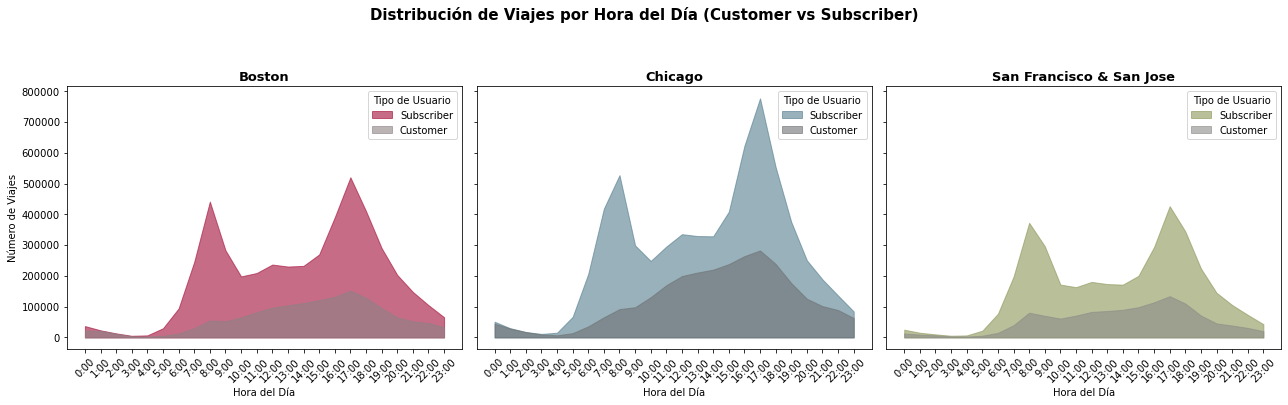

In [32]:
# Extraemos la hora del día
df_filtered['Hour'] = df_filtered['starttime'].dt.hour

# Lista de ciudades
cities = ['Boston', 'Chicago', 'San Francisco & San Jose']

# Diccionario de colores personalizados
custom_colors = {
    'Boston': {
        'Customer': '#8C8285',
        'Subscriber': '#A30B37'
    },
    'Chicago': {
        'Customer': '#6E7173',
        'Subscriber': '#537D8D'
    },
    'San Francisco & San Jose': {
        'Customer': '#8B8C87',
        'Subscriber': '#8B9556'
    }
}

# Crear figura 1 fila × 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Creamos un grafico de lineas rellenado
for i, city in enumerate(cities):
    ax = axes[i]
    city_data = df_filtered[df_filtered['city'] == city]

    # Agrupar por hora y tipo de usuario
    grouped = city_data.groupby(['Hour', 'usertype']).size().reset_index(name='count')

    # Pivot para tener horas como filas y tipos de usuario como columnas
    pivot = grouped.pivot(index='Hour', columns='usertype', values='count').fillna(0)

    # Asegurarse de que estén todas las horas (0 a 23)
    pivot = pivot.reindex(range(24), fill_value=0)

    # Graficar áreas rellenas por usertype con color personalizado
    for usertype in ['Subscriber', 'Customer']:
        ax.fill_between(
            pivot.index,
            pivot[usertype],
            alpha=0.6,
            label=usertype,
            color=custom_colors[city][usertype]
        )

    ax.set_title(f'{city}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Hora del Día')
    ax.set_xticks(range(0, 24))
    ax.set_xticklabels([f'{h}:00' for h in range(24)], rotation=45)
    if i == 0:
        ax.set_ylabel('Número de Viajes')
    ax.legend(title='Tipo de Usuario')

# Título general
plt.suptitle('Distribución de Viajes por Hora del Día (Customer vs Subscriber)', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0.05, 1, 0.92])
plt.show()
